In [2]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Define parameters

In [3]:
E_c=2  #conduction band minimum
E_v=-2 #valence band minimum

delta=0.5 ##V-C split

tc=-1 # conduction band hopping
tv=1 # valence band hopping

### 2. Define matrix

In [4]:
H00=np.array([[E_c+delta,0],[0,E_v-delta]]) ## onsite matrix
H01=np.array([[tc,0.5],[-0.5,tv]]) ## hopping

H10=np.array([[tc,-0.5],[0.5,tv]])

In [9]:
H00

array([[ 2.5,  0. ],
       [ 0. , -2.5]])

** Function for polyeign problems **

In [5]:
def polyeig(e,H00,V01,V10):
    a=V01;b=V10
    N=len(a)
    A=np.zeros([2*N,2*N],complex)
    B=np.zeros([2*N,2*N],complex)

    A[0:N,N:2*N]=np.eye(N);A[N:2*N,0:N]=-b
    B[0:N,0:N]=np.eye(N);B[N:2*N,0:N]=(H00[:,:])-(e+0.001)*np.eye(N);B[N:2*N,N:2*N]=a
    #C=dot(alg.inv(B),A)

    eign=lin.eigvals(A,B)
    return (1/(1j*1))*np.log(eign)

### 3. Solutions

In [65]:
eigenve=polyeig(0.1,H00,H01,H10)
print (eigenve)

[ 0.+0.6223625j   0.-0.6223625j   0.+0.75643291j  0.-0.75643291j]


In [6]:
## Imaginary band

NE=201;
gap=np.linspace(-4,4,NE)

ret_evala=np.zeros([4,NE],dtype=complex)
for i,e in enumerate(gap):
    eigvaluea=np.array(polyeig(e,H00,H01,H10).imag,complex)
    argsa=eigvaluea.argsort()
    eigvaluea=eigvaluea[argsa]
    ret_evala[:,i]=eigvaluea[:]

In [7]:
## Real band

NE=201;
Energy=np.linspace(-4,4,NE)

ret_eval=np.zeros([4,NE],dtype=complex)
for i,e in enumerate(Energy):
    eigvalue=np.array(polyeig(e,H00,H01,H10).real,complex)
    args=eigvalue.argsort()
    eigvalue=eigvalue[args]
    ret_eval[:,i]=eigvalue[:]

### 4. Plot

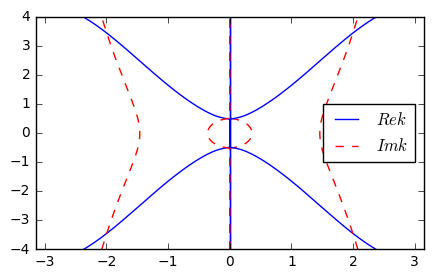

In [11]:
# for i in range(0,4,1):
#     plt.plot(ret_eval[i,:],Energy,'b-',linewidth=0.8)
#     plt.plot(ret_evala[i,:],gap,'r--',linewidth=0.8)
# plt.ylim(-4,4);plt.xlim(-np.pi,np.pi)
# plt.show()


fig = plt.figure(figsize=(5,3), dpi=200)
ax = fig.add_subplot(1, 1, 1)

for i in range(0,3,1):
    ax.plot(ret_eval[i,:],Energy,'b-')
    ax.plot(ret_evala[i,:],gap,'r--')
    
ax.plot(ret_eval[3,:],Energy,'b-',label=r"$Rek$")
ax.plot(ret_evala[3,:],gap,'r--',label=r"$Imk$")
    
ax.legend(loc=5)
ax.set_ylim(-4,4)
# ax.set_yticks((-1,0,1))
# ax.set_yticklabels(('-1','0','1'),size='large')

# ax.axvline(x=2,color='k',ls='--')
# ax.axvline(x=-2,color='k',ls='--')
ax.set_xlim(-np.pi,np.pi)


# plt.savefig(r'\Users\Tsymbal Group Member\OneDrive - University of Nebraska-Lincoln\PhD_work\PhD_thesis\fig4.png',dpi=400)
plt.show()

In [74]:
Energy

array([-4.  , -3.96, -3.92, -3.88, -3.84, -3.8 , -3.76, -3.72, -3.68,
       -3.64, -3.6 , -3.56, -3.52, -3.48, -3.44, -3.4 , -3.36, -3.32,
       -3.28, -3.24, -3.2 , -3.16, -3.12, -3.08, -3.04, -3.  , -2.96,
       -2.92, -2.88, -2.84, -2.8 , -2.76, -2.72, -2.68, -2.64, -2.6 ,
       -2.56, -2.52, -2.48, -2.44, -2.4 , -2.36, -2.32, -2.28, -2.24,
       -2.2 , -2.16, -2.12, -2.08, -2.04, -2.  , -1.96, -1.92, -1.88,
       -1.84, -1.8 , -1.76, -1.72, -1.68, -1.64, -1.6 , -1.56, -1.52,
       -1.48, -1.44, -1.4 , -1.36, -1.32, -1.28, -1.24, -1.2 , -1.16,
       -1.12, -1.08, -1.04, -1.  , -0.96, -0.92, -0.88, -0.84, -0.8 ,
       -0.76, -0.72, -0.68, -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44,
       -0.4 , -0.36, -0.32, -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08,
       -0.04,  0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,
        0.32,  0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,
        0.68,  0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,
        1.04,  1.08,

### 5. Analytic solutions

In [92]:
def sol(e,t,en,sign):
    a1=e-en
    a2=np.sqrt((e-en)**2-4*(t**2)+0*1j)
    if (sign)==0:
        return (1/1j)*np.log((-a1+a2)/(2*t))
    else:
        return (1/1j)*np.log((-a1-a2)/(2*t))



In [89]:
NE=201;
Energy=np.linspace(-4,4,NE)

In [95]:
k10=np.zeros([NE],dtype=complex)
k11=np.zeros([NE],dtype=complex)
k20=np.zeros([NE],dtype=complex)
k21=np.zeros([NE],dtype=complex)

for i in range(len(Energy)):
    k10[i]=sol(2.5,-1,Energy[i],0).imag
    k11[i]=sol(2.5,-1,Energy[i],1).imag
    k20[i]=sol(-2.5,1,Energy[i],0).imag
    k21[i]=sol(-2.5,1,Energy[i],1).imag

[]

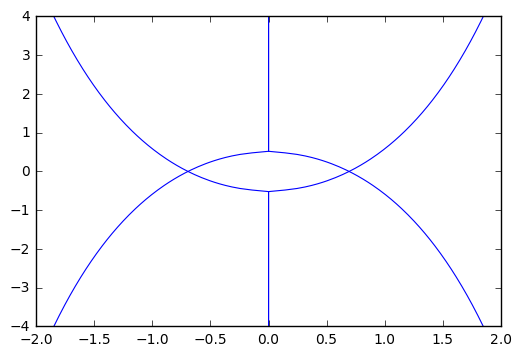

In [96]:

plt.plot(k10,Energy,'b-',linewidth=0.8)
plt.plot(k11,Energy,'b-',linewidth=0.8)
plt.plot(k20,Energy,'b-',linewidth=0.8)
plt.plot(k21,Energy,'b-',linewidth=0.8)

plt.plot()